In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from timeit import timeit

In [5]:
df = pd.read_csv("data-OLS.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       298 non-null    float64
 1   y       298 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


,x,y
0,0.00503,-0.05645
1,0.01005,0.06281
2,0.01508,0.00911
3,0.02010,0.03519
4,0.02513,0.08541


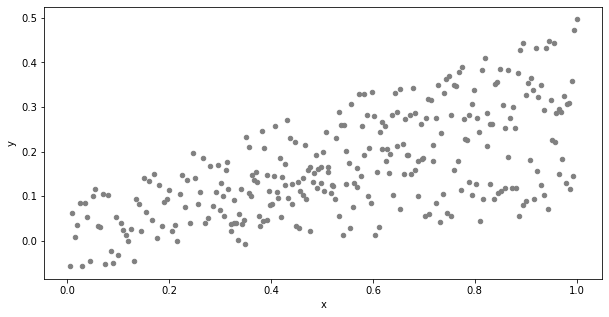

In [10]:
plt.rcParams["figure.figsize"] = (10,5)
df.plot.scatter(x='x', y='y', color="gray")
plt.show()

In [8]:
# OLS function for OLS using scipy.optimize.minimize

def SSE(params):
    a1, a0 = params
    x = df['x']
    y = df['y']
    return ((y - (a1 * x + a0)) ** 2).sum()

def optimize_minimize():
    return optimize.minimize(fun=SSE, x0=np.array(([0,1])))['x']

In [9]:
# apply optimize.minimize function

a1, a0 = optimize_minimize()
print("a1:", a1)
print("a0:", a0)

a1: 0.2733703153136902
a0: 0.01707015525879385


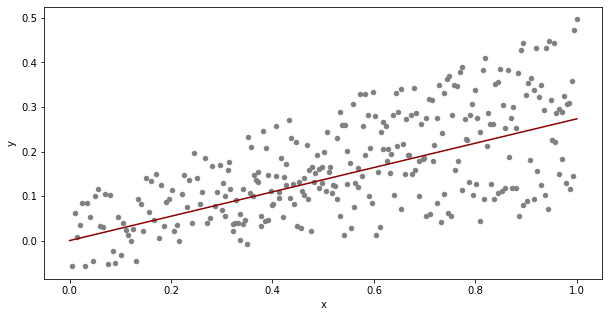

In [15]:
# plot with optimize.minimize parameter
plt.rcParams["figure.figsize"] = (10,5)

x = np.linspace(0, 1, 2)
df.plot.scatter(x="x", y="y", color="grey")
plt.plot(x, a1 * x + a0, color="darkred")
plt.show()

In [17]:
# OLS function for OLS using matrices
# ones added for matrix multiplication to adress the dimensions
# matrix vector is linear independent
# formula from slides

def matrix_solution():
    x_transposed = np.array((df['x'].to_numpy(), 
                             np.ones_like(df['x'].to_numpy())))
    y_transposed = np.array((df['y'].to_numpy(), 
                             np.ones_like(df['y'].to_numpy())))
    # Compute the (multiplicative) inverse of a matrix.
    # @ is the matrix multiplicator
    A = np.linalg.inv(x_transposed @ x_transposed.T) @ x_transposed @ y_transposed.T
    return A[0]

In [18]:
a1, a0 = matrix_solution()
print("a1:", a1)
print("a0:", a0)

a1: 0.27337029288410164
a0: -2.220446049250313e-16


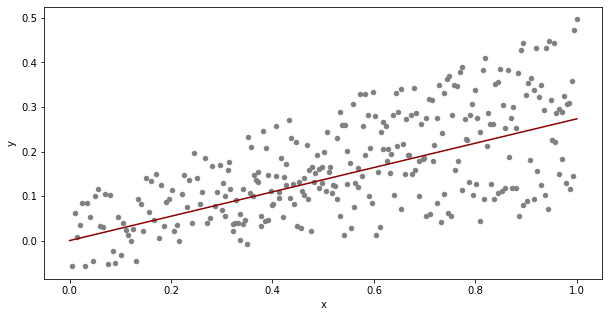

In [19]:
# plot with matrix solution parameter
plt.rcParams["figure.figsize"] = (10,5)

x = np.linspace(0, 1, 2)
df.plot.scatter(x="x", y="y", color="grey")
plt.plot(x, a1 * x + a0, color="darkred")
plt.show()

In [20]:
# compare runtime between minimize and matrix solution
%timeit optimize_minimize()
%timeit matrix_solution()

10.5 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
46.3 µs ± 407 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
# set lambda
lambda_1 = 10
lambda_2 = 5


# ridge regression
# Bei der Ridge-Regression wird die Kostenfunktion geändert, indem eine Strafe hinzugefügt wird, 
# die dem Quadrat der Größe der Koeffizienten entspricht.
def SSE_ridge_regression(params):
    a1, a0 = params
    return SSE(params) + lambda_1 * (a1 ** 2 + a0 ** 2)
def optimize_minimize_ridge():
    return optimize.minimize(SSE_ridge_regression, np.array(([0,1])))['x']


# lasso regression
# Lasso Regression is different from ridge regression as it uses absolute coefficient values for normalization.
def SSE_lasso_regression(params):
    a1, a0 = params
    return SSE(params) + lambda_2 * (abs(a1) + abs(a0))
def optimize_minimize_lasso():
    return optimize.minimize(SSE_lasso_regression, np.array(([0,1])))['x'] 


# elastic net 
def SSE_elastic_net(params):
    a1, a0 = params
    return SSE(params) + lambda_2 * (abs(a1) + abs(a0)) + lambda_2 * (a1 ** 2 + a0 ** 2)
def optimize_minimize_elastic_net():
    return optimize.minimize(SSE_elastic_net, np.array(([0,1])))['x'] 

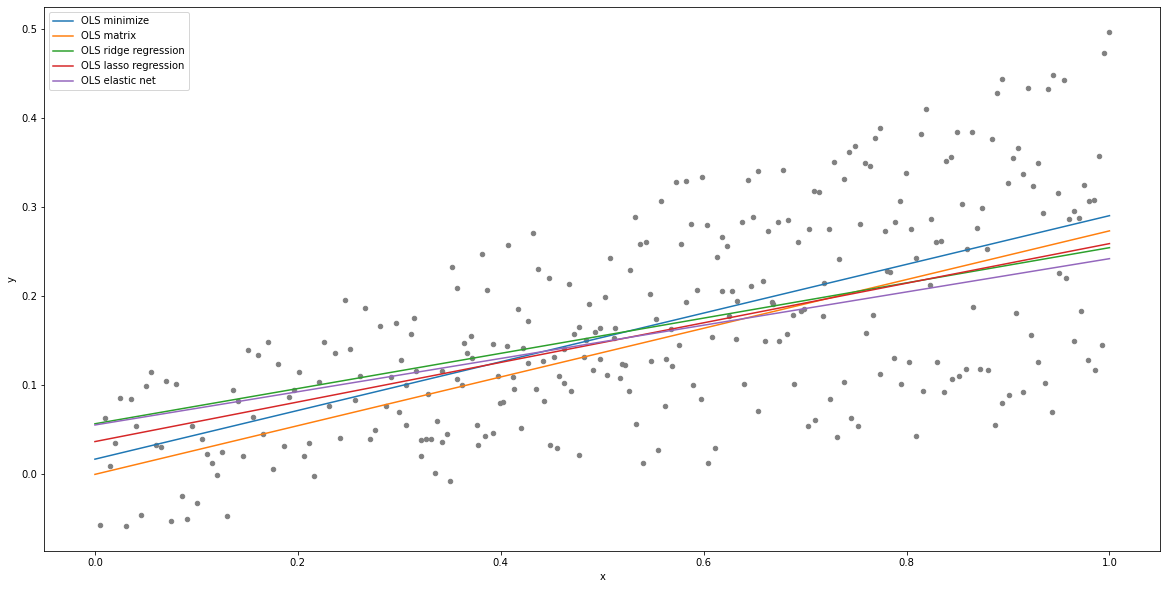

In [22]:
# plot to compare optimize and regularization methods
plt.rcParams["figure.figsize"] = (20,10)

x = np.linspace(0, 1, 2)
df.plot.scatter(x="x", y="y", color="grey")


a1, a0 = optimize_minimize()
plt.plot(x, a1 * x + a0, label="OLS minimize")
a1, a0 = matrix_solution()
plt.plot(x, a1 * x + a0, label = "OLS matrix")
a1, a0 = optimize_minimize_ridge()    
plt.plot(x, a1 * x + a0, label= "OLS ridge regression")
a1, a0 = optimize_minimize_lasso()    
plt.plot(x, a1 * x + a0, label= "OLS lasso regression")
a1, a0 = optimize_minimize_elastic_net()    
plt.plot(x, a1 * x + a0, label= "OLS elastic net")

plt.legend()
plt.show()

In [13]:
# compare runtime among all solutions
print("OLS minimize:")
%timeit optimize_minimize()
print("\nOLS matrix:")
%timeit matrix_solution()
print("\nOLS ridge regression:")
%timeit optimize_minimize_ridge()
print("\nOLS lasso regression:")
%timeit optimize_minimize_lasso()
print("\nOLS elastic net:")
%timeit optimize_minimize_elastic_net()

OLS minimize:
10 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

OLS matrix:
49.9 µs ± 981 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

OLS ridge regression:
10.1 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

OLS lasso regression:
19.8 ms ± 246 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

OLS elastic net:
21.3 ms ± 2.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
